In [1]:
import geopandas as gpd
import numpy as np

import sys
sys.path.append('C:/Users/mbonney/OneDrive - NRCan RNCan/Projects/UtilityCode/DataAccess/Utilities')
sys.path.append('C:/Users/mbonney/OneDrive - NRCan RNCan/Projects/UtilityCode/Visualization/Utilities')

import STAC_Utils as sutil
import PreProcess_Utils as pputil
import Viz_Utils as vutil

In [2]:
# Dask cluster could go here

In [3]:
tiles = gpd.read_file('C:/Users/mbonney/OneDrive - NRCan RNCan/Projects/HBL/Tiling/TileSystems/60km/canadaFishnet_60km_HBL.shp')
selected = tiles[(tiles['FID_1'] == 960)]
selected # Can replace with any GeoDataFrame (or path to shapefile)

,FID_1,geometry
106,960,"POLYGON ((658705.079 655715.838, 658705.079 71..."


In [4]:
start = '2022-07-01' 
end = '2023-07-31'
bands = ['BLUE', 'GREEN', 'RED', 'NIR', 'SWIR1', 'SWIR2', 'SCL']
sceneCloudThresh = 90

In [5]:
%%time
s2s, s2m = sutil.buildS2(selected, start, end,  bands, sceneCloudThresh, proj = 'poly', verbose = True)

Connected to AWS E84.
S2 images found on AWS E84 (n = 600).
...Building S2 spectral cube...
Removed images with NaT times (n = 600).
Removed images above 90% scene-level clouds (n = 364).
Same-day time-steps merged (n = 119).
...Building S2 SCL cube...
Removed images with NaT times (n = 600).
Removed images above 90% scene-level clouds (n = 364).
Same-day time-steps merged (n = 119).
CPU times: total: 6.94 s
Wall time: 13 s


In [6]:
s2s

<xarray.DataArray 'stackstac-0ea54a3513844ad9d481a516d306b880' (time: 119,
                                                                band: 6,
                                                                y: 6001, x: 6001)> Size: 51GB
dask.array<concatenate, shape=(119, 6, 6001, 6001), dtype=uint16, chunksize=(1, 6, 6001, 6001), chunktype=numpy.ndarray>
Coordinates:
  * x        (x) float64 48kB 6.587e+05 6.587e+05 ... 7.187e+05 7.187e+05
  * y        (y) float64 48kB 7.157e+05 7.157e+05 ... 6.557e+05 6.557e+05
  * time     (time) datetime64[ns] 952B 2022-07-02 2022-07-04 ... 2023-07-29
  * band     (band) <U5 120B 'BLUE' 'GREEN' 'RED' 'NIR' 'SWIR1' 'SWIR2'
Attributes:
    spec:        RasterSpec(epsg=3979, bounds=(658700, 655710, 718710, 715720...
    crs:         epsg:3979
    transform:   | 10.00, 0.00, 658700.00|\n| 0.00,-10.00, 715720.00|\n| 0.00...
    resolution:  10

In [14]:
s2s_inMem = pputil.loadXR(s2s[0:1,:]) # Just a couple timesteps for demo
s2s_inMem

[########################################] | 100% Completed | 86.28 s


<xarray.DataArray 'stackstac-0ea54a3513844ad9d481a516d306b880' (time: 1,
                                                                band: 6,
                                                                y: 6001, x: 6001)> Size: 432MB
array([[[[   0,    0,    0, ..., 3308, 3288, 2986],
         [   0,    0,    0, ..., 3452, 3192, 2642],
         [   0,    0,    0, ..., 3376, 3356, 2888],
         ...,
         [   0,    0,    0, ..., 1996, 1880, 1544],
         [   0,    0,    0, ..., 2216, 1968, 1744],
         [   0,    0,    0, ..., 2156, 1764, 1772]],

        [[   0,    0,    0, ..., 3212, 3112, 2648],
         [   0,    0,    0, ..., 3264, 2962, 2386],
         [   0,    0,    0, ..., 3220, 3066, 2702],
         ...,
         [   0,    0,    0, ..., 1984, 1826, 1574],
         [   0,    0,    0, ..., 2198, 1932, 1716],
         [   0,    0,    0, ..., 2136, 1896, 1810]],

        [[   0,    0,    0, ..., 3042, 2930, 2298],
         [   0,    0,    0, ..., 3002, 2662, 2146],
         [   0,    0,    0, ..., 3112, 2850, 2472],
         ...,
...
         ...,
         [   0,    0,    0, ..., 3758, 3758, 3775],
         [   0,    0,    0, ..., 3758, 3515, 3463],
         [   0,    0,    0, ..., 3515, 3515, 3463]],

        [[   0,    0,    0, ..., 3281, 2861, 2861],
         [   0,    0,    0, ..., 3190, 2811, 2811],
         [   0,    0,    0, ..., 3190, 3190, 2811],
         ...,
         [   0,    0,    0, ..., 2144, 2144, 2012],
         [   0,    0,    0, ..., 2144, 2079, 1963],
         [   0,    0,    0, ..., 2079, 2079, 1963]],

        [[   0,    0,    0, ..., 2845, 2439, 2439],
         [   0,    0,    0, ..., 2743, 2441, 2441],
         [   0,    0,    0, ..., 2743, 2743, 2441],
         ...,
         [   0,    0,    0, ..., 1498, 1498, 1373],
         [   0,    0,    0, ..., 1498, 1523, 1426],
         [   0,    0,    0, ..., 1523, 1523, 1426]]]], dtype=uint16)
Coordinates:
  * x        (x) float64 48kB 6.587e+05 6.587e+05 ... 7.187e+05 7.187e+05
  * y        (y) float64 48kB 7.157e+05 7.157e+05 ... 6.557e+05 6.557e+05
  * time     (time) datetime64[ns] 8B 2022-07-02
  * band     (band) <U5 120B 'BLUE' 'GREEN' 'RED' 'NIR' 'SWIR1' 'SWIR2'
Attributes:
    spec:        RasterSpec(epsg=3979, bounds=(658700, 655710, 718710, 715720...
    crs:         epsg:3979
    transform:   | 10.00, 0.00, 658700.00|\n| 0.00,-10.00, 715720.00|\n| 0.00...
    resolution:  10

In [15]:
%%time
s2s_inMem = pputil.rescaleReduce(s2s_inMem, rescale = 0.0001, fill = 0, verbose = True)
s2s_inMem

0 set to NA and other values rescaled by 0.0001.
CPU times: total: 1.69 s
Wall time: 1.69 s


<xarray.DataArray 'stackstac-0ea54a3513844ad9d481a516d306b880' (time: 1,
                                                                band: 6,
                                                                y: 6001, x: 6001)> Size: 864MB
array([[[[       nan,        nan,        nan, ..., 0.3308    ,
          0.3288    , 0.2986    ],
         [       nan,        nan,        nan, ..., 0.3452    ,
          0.31919998, 0.2642    ],
         [       nan,        nan,        nan, ..., 0.3376    ,
          0.3356    , 0.2888    ],
         ...,
         [       nan,        nan,        nan, ..., 0.1996    ,
          0.188     , 0.15439999],
         [       nan,        nan,        nan, ..., 0.2216    ,
          0.1968    , 0.1744    ],
         [       nan,        nan,        nan, ..., 0.2156    ,
          0.17639999, 0.17719999]],

        [[       nan,        nan,        nan, ..., 0.32119998,
          0.3112    , 0.26479998],
         [       nan,        nan,        nan, ..., 0.32639998,
          0.2962    , 0.2386    ],
         [       nan,        nan,        nan, ..., 0.322     ,
          0.3066    , 0.27019998],
...
         [       nan,        nan,        nan, ..., 0.2144    ,
          0.2144    , 0.2012    ],
         [       nan,        nan,        nan, ..., 0.2144    ,
          0.20789999, 0.1963    ],
         [       nan,        nan,        nan, ..., 0.20789999,
          0.20789999, 0.1963    ]],

        [[       nan,        nan,        nan, ..., 0.2845    ,
          0.2439    , 0.2439    ],
         [       nan,        nan,        nan, ..., 0.27429998,
          0.24409999, 0.24409999],
         [       nan,        nan,        nan, ..., 0.27429998,
          0.27429998, 0.24409999],
         ...,
         [       nan,        nan,        nan, ..., 0.1498    ,
          0.1498    , 0.1373    ],
         [       nan,        nan,        nan, ..., 0.1498    ,
          0.1523    , 0.1426    ],
         [       nan,        nan,        nan, ..., 0.1523    ,
          0.1523    , 0.1426    ]]]], dtype=float32)
Coordinates:
  * x        (x) float64 48kB 6.587e+05 6.587e+05 ... 7.187e+05 7.187e+05
  * y        (y) float64 48kB 7.157e+05 7.157e+05 ... 6.557e+05 6.557e+05
  * time     (time) datetime64[ns] 8B 2022-07-02
  * band     (band) <U5 120B 'BLUE' 'GREEN' 'RED' 'NIR' 'SWIR1' 'SWIR2'

CPU times: total: 14 s
Wall time: 14.1 s


C:\Users\mbonney\Miniforge3\envs\rs3\Lib\site-packages\matplotlib\cm.py:494: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


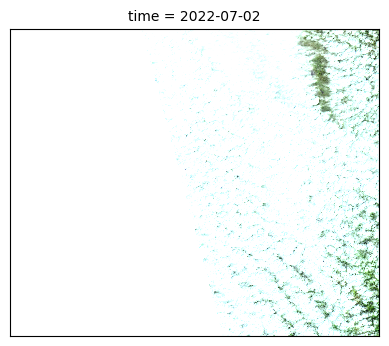

In [16]:
%%time
vutil.matrixPlot(s2s_inMem, 's2', 'spectral', bands = ['SWIR1', 'NIR', 'GREEN'], vmax = 0.5)

In [10]:
s2m

<xarray.DataArray 'stackstac-91fb771e57904717cd47ed72328874b4' (time: 119,
                                                                band: 1,
                                                                y: 6001, x: 6001)> Size: 4GB
dask.array<concatenate, shape=(119, 1, 6001, 6001), dtype=uint8, chunksize=(1, 1, 6001, 6001), chunktype=numpy.ndarray>
Coordinates:
  * band        (band) <U3 12B 'scl'
  * x           (x) float64 48kB 6.587e+05 6.587e+05 ... 7.187e+05 7.187e+05
  * y           (y) float64 48kB 7.157e+05 7.157e+05 ... 6.557e+05 6.557e+05
    proj:shape  object 8B {5490}
  * time        (time) datetime64[ns] 952B 2022-07-02 2022-07-04 ... 2023-07-29
Attributes:
    spec:        RasterSpec(epsg=3979, bounds=(658700, 655710, 718710, 715720...
    crs:         epsg:3979
    transform:   | 10.00, 0.00, 658700.00|\n| 0.00,-10.00, 715720.00|\n| 0.00...
    resolution:  10

In [11]:
s2m_inMem = pputil.loadXR(s2m[0,:]) # Just one timestep
s2m_inMem

[########################################] | 100% Completed | 4.86 ss


<xarray.DataArray 'stackstac-91fb771e57904717cd47ed72328874b4' (band: 1,
                                                                y: 6001, x: 6001)> Size: 36MB
array([[[0, 0, 0, ..., 9, 9, 9],
        [0, 0, 0, ..., 9, 8, 8],
        [0, 0, 0, ..., 9, 9, 8],
        ...,
        [0, 0, 0, ..., 8, 8, 8],
        [0, 0, 0, ..., 8, 8, 8],
        [0, 0, 0, ..., 8, 8, 8]]], dtype=uint8)
Coordinates:
  * band        (band) <U3 12B 'scl'
  * x           (x) float64 48kB 6.587e+05 6.587e+05 ... 7.187e+05 7.187e+05
  * y           (y) float64 48kB 7.157e+05 7.157e+05 ... 6.557e+05 6.557e+05
    proj:shape  object 8B {5490}
    time        datetime64[ns] 8B 2022-07-02
Attributes:
    spec:        RasterSpec(epsg=3979, bounds=(658700, 655710, 718710, 715720...
    crs:         epsg:3979
    transform:   | 10.00, 0.00, 658700.00|\n| 0.00,-10.00, 715720.00|\n| 0.00...
    resolution:  10

In [12]:
np.unique(s2m_inMem)

array([ 0,  3,  4,  5,  6,  7,  8,  9, 10], dtype=uint8)